#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
# Read CSV
url = ("https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv")
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
df.duplicated().any()

True

In [4]:
df = df.drop_duplicates()

Periksa apakah ada missing values

In [5]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

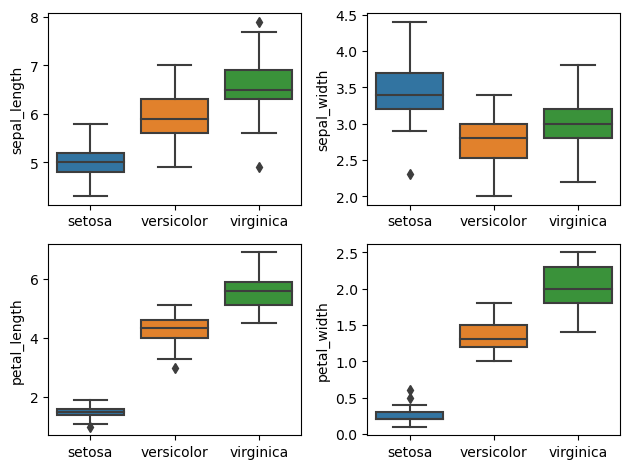

In [6]:
fig, axes = plt.subplots(2, 2)

sns.boxplot(x='species', y='sepal_length', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("sepal_length")

sns.boxplot(x='species', y='sepal_width', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("sepal_width")

sns.boxplot(x='species', y='petal_length', data=df, ax=axes[1, 0])
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("petal_length")

sns.boxplot(x='species', y='petal_width', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("petal_width")

plt.tight_layout()
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [7]:
X = df.drop("species", axis=1)
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)

classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [11]:
y_pred = classifier.predict(X_test)
print(y_pred)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor']


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[7 0 0]
 [0 4 0]
 [0 1 3]]
Accuracy Score :  0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [13]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [14]:
y_pred = naive_bayes.predict(X_test)
print(y_pred)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[7 0 0]
 [0 4 0]
 [0 1 3]]
Accuracy Score :  0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [16]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [17]:
y_pred = knn.predict(X_test)
print(y_pred)

['setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor']


C:\Users\Jefferson\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Ukur akurasi dari model K-Nearest Neighbor

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Confusion Matrix : 
 [[7 0 0]
 [0 4 0]
 [0 1 3]]
Accuracy Score :  0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah semua model klasifikasi sama